<a href="https://colab.research.google.com/github/FuturisticLover123/InnowiseInternship/blob/main/task1/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
kaggle_token = {"username":"arseniyatrushkevich",
 "key":"546c397b87b27d9af5160bae671e5259"}

json.dump(kaggle_token, open('kaggle.json', 'w'))

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!mkdir -p data_storage
!kaggle competitions download -c competitive-data-science-predict-future-sales -p data_storage
!unzip -q data_storage/competitive-data-science-predict-future-sales.zip -d data_storage


  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 743MB/s]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train = pd.read_csv('/content/data_storage/sales_train.csv')
shops = pd.read_csv('/content/data_storage/shops.csv')
items = pd.read_csv('/content/data_storage/items.csv')
item_categories = pd.read_csv('/content/data_storage/item_categories.csv')
test = pd.read_csv('/content/data_storage/test.csv')

In [8]:
display(train.head())
display(test.head())
display(items.head())
display(item_categories.head())
display(shops.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


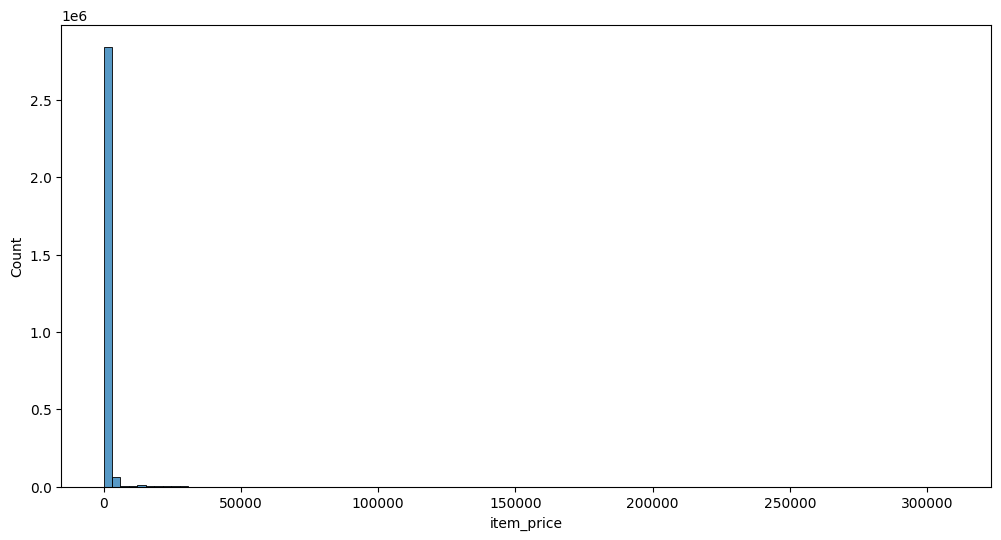

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(train['item_price'], bins=100)
plt.show()
# сомнительно

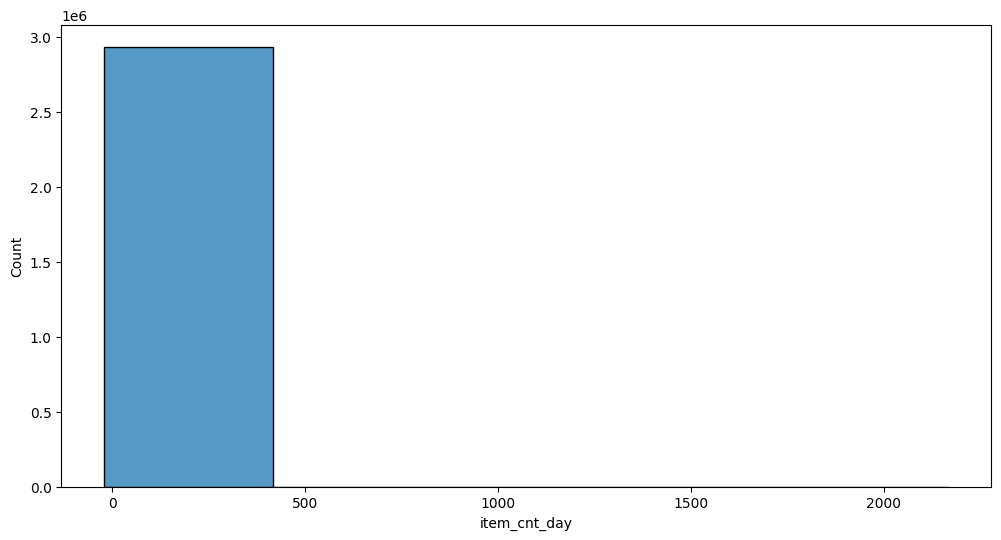

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(train['item_cnt_day'], bins=5)
plt.show()

In [30]:
negative_sales = train[train['item_cnt_day'] < 0]
display(negative_sales.head())
# отрицательные продажи это сомнительно

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0


In [35]:
high_prices = train[train['item_price'] > 100000]
print(f"Товары с ценой > 100,000: {len(high_prices)}")
display(high_prices.head())
# очень дорого

Товары с ценой > 100,000: 1


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


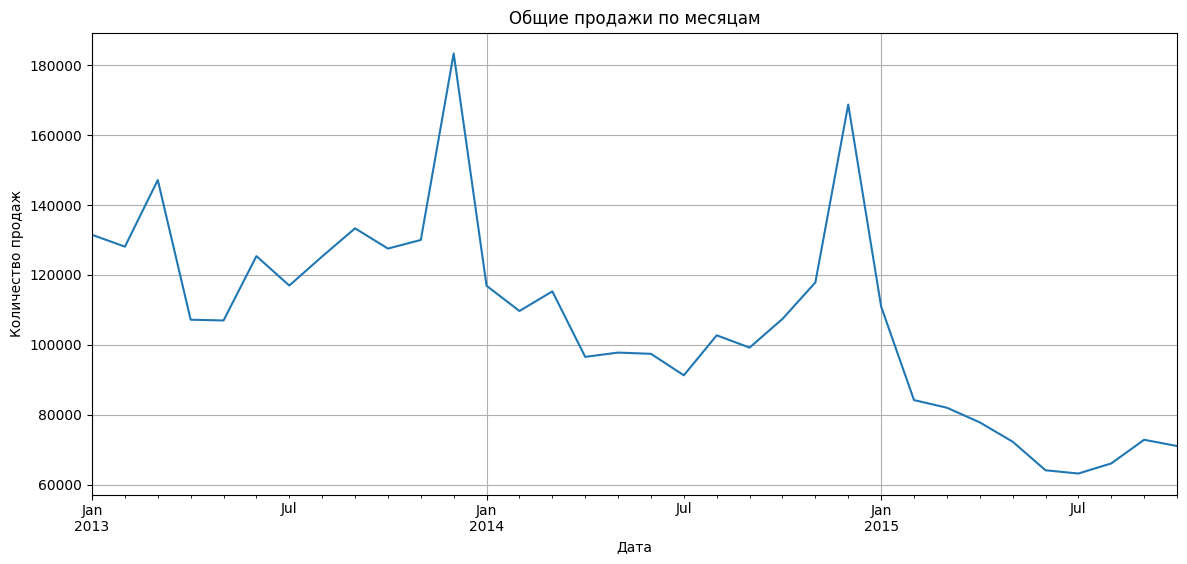

In [38]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
monthly_sales = train.groupby(pd.to_datetime(train['date']).dt.to_period('M'))['item_cnt_day'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(title='Общие продажи по месяцам', grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

# 2 явных пика перед новым годом